In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

**INTRODUÇÃO**

Este projeto de análise de dados tem como objetivo explorar o desempenho de uma campanha de marketing direto realizada por uma instituição bancária. A campanha foi voltada para a promoção de depósitos a prazo, um produto financeiro estratégico para o banco. Utilizando um conjunto de dados detalhado com informações demográficas, financeiras e comportamentais dos clientes, o projeto busca identificar padrões, tendências e fatores que influenciam a aceitação ou rejeição da oferta de depósito.

**Primeiramente fazendo a analise dos dados e se precisa de tratamentos**

In [6]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [10]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Como analisado, não existem valores nulos e todas as colunas vão ser de suma importancia para analisarmos meticulosamente todas as variaveis presentes para o sucesso ou melhora para um futuro projeto.

**Analisando a distribuição de idade**

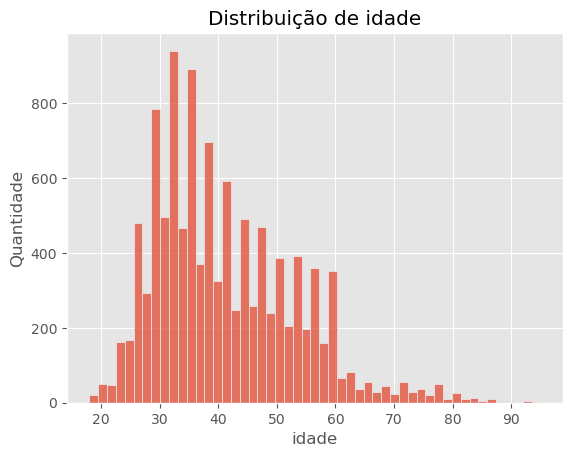

In [13]:
#Plotando a distribuição de idade
sns.histplot(df,x = 'age');
plt.xlabel('idade');
plt.ylabel('Quantidade');
plt.title('Distribuição de idade');

Analisando o gráfico, vemos que a maioria das pessoas cadastradas tem entre 25 e 40 anos. E entre os menores números de quantidade fica entre os extremos.

**Analisando os extremos das idades para uma melhor eficácia de aceitação de depósitos**

In [17]:
idade_menor_23 = df[(df['age'] <= 23) & (df['deposit'] == 'yes')]
idade_maior_60 = df[(df['age'] >= 60) & (df['deposit'] == 'yes')]
idade_entre = df[(df['age'] >= 24) & (df['age'] <= 59) & (df['deposit'] == 'yes')]
idade_menor_23.shape[0]

139

In [19]:
idade_maior_60.shape[0]

600

In [21]:
idade_maior_60_aposentado = df[(df['age'] >= 60) & (df['deposit'] == 'yes') & (df['job'] == 'retired')]
idade_maior_60_aposentado.shape[0]

410

In [23]:
idade_entre.shape[0]

4550

A quantidade de jovens que aceitam o depósito é de 3% do valor total, já os maiores de 60 anos representa 13% do valor total, com isso o banco deveria fazer contas especifícas para jovens com tarifas reduzidas, benefícios e projetos sobre a introdução á educação financeira para capturar mais o interesse no jovem. Os maiores de 60 anos tem mais conta que os jovens porque eles precisam das contas bancárias para receber as aposentadorias, pensões e os rendimentos de investimentos. Fazendo a análise, 68% dos idosos maiores de 60 anos são aposentados. Porem o banco poderia fazer algumas campanhas de marketing ao incentivo de uso do dele, usar um suporte personalizado e aplicativos digitais simplificados para o uso cotidiano.

**Analisando se a taxa de aceitação varia entre os niveis de escolaridade**

In [27]:
escolaridade_primário = df[(df['education'] == 'primary') & (df['deposit'] == 'yes')]
escolaridade_média = df[(df['education'] == 'secondary') & (df['deposit'] == 'yes')]
escolaridade_superior = df[(df['education'] == 'tertiary') & (df['deposit'] == 'yes')]

In [29]:
escolaridade_primário.shape[0]

591

In [31]:
escolaridade_média.shape[0]

2450

In [33]:
escolaridade_superior.shape[0]

1996

As pessoas com escolaridade básica representam 11% do total da aceitação, com escolaridade média representam 48% e com a escolaridade superior 39%

**Analise mais profunda da aceitação por nivel de escolaridade**

In [37]:
escolaridade_primário['job'].value_counts().head()

job
blue-collar    218
retired        178
housemaid       49
unemployed      34
services        29
Name: count, dtype: int64

In [39]:
escolaridade_primário['age'].mean()

51.60744500846024

In [41]:
escolaridade_primário['previous'].value_counts()

previous
0     418
1      52
2      37
3      33
4      15
5      11
6       6
7       4
12      3
10      3
8       3
11      2
22      1
58      1
13      1
20      1
Name: count, dtype: int64

In [43]:
escolaridade_primário_resultado= df[(df['education'] == 'primary') & (df['deposit'] == 'yes') & (df['previous'] > 0)]

In [45]:
escolaridade_primário_resultado['poutcome'].value_counts()

poutcome
success    81
failure    57
other      35
Name: count, dtype: int64

Podemos colocar como causa de baixa adesão pelo nivel de escolaridade básica, a falta da educação financeira desde cedo, então o banco pode criar cursos e palestras para orientar sobre a educação financeira para esse grupo, outra caracteristica é a média de idade que está entre os idosos que citamos acima, então todos os programas que citei acima pode ser inserido a esse grupo e por fim os contatos realizados antes da campanha que estão com números muito abaixo, como podemos ver na célula acima 46% das pessoas que foram contatadas antes tiveram sucesso com o depósito, então otimizar os canais de comunicação pode gerar um sucesso maior.

**Analisando se os clientes com empréstimos podem ter baixa adesão**

In [49]:
adesão_emprestimo = df[(df['loan'] == 'yes') & (df['deposit'] == 'yes')]
adesão_emprestimo.shape[0]

484

In [51]:
adesão_sem_emprestimo = df[(df['loan'] == 'no') & (df['deposit'] == 'yes')]
adesão_sem_emprestimo.shape[0]

4805

Os emprestimos tendem a atrapalhar na adesão dos depósitos, vemos que apenas 10% das pessoas quem tem emprestimos aceitaram realizar os depósitos. As razões para a baixa adesão podem ser o compromentimento financeiro, pois o fluxo de caixa da pessoa pode ser comprometido devido aos pagamentos mensais das parcelas e os clientes podem perceber a oferta do depósito como secúndaria pois esta priorizando o pagamento das dividas. Uma solução estratégica para esse problema pode ser a criação de pacotes de benefícios combinados. O banco poderia oferecer descontos nas parcelas do empréstimo ou taxas de juros reduzidas para aqueles que aceitarem fazer depósitos, incentivando, assim, a adesão a esse produto. Essa abordagem não apenas alivia a pressão financeira do cliente, mas também pode ajudá-lo a melhorar seu fluxo de caixa, tornando o depósito uma opção mais atrativa.

**Analisando o impacto da duração da chamada na taxa de aceitação**

In [83]:
deposit_yes['duration'].value_counts().head(10)

duration
261    19
226    17
187    16
229    16
232    16
301    15
268    15
158    15
192    14
212    14
Name: count, dtype: int64

In [85]:
deposit_no = df[df['deposit'] == 'no']
deposit_no['duration'].value_counts().head(10)

duration
119    32
90     32
114    32
85     31
97     31
161    31
109    31
77     30
112    30
73     30
Name: count, dtype: int64

Podemos analisar que conversar mais longas, em torno de 3 minutos e 5 minutos tem uma aceitação maior do que conversas curtas entre 1 minuto e 2 minutos, que tem a taxa de rejeição maior. Para melhorar esse indice, podemos sugerir um treinamento mais aprofundado á equipe de telecomunicações e com dados mais aprofundados, podemos otimizar os horários das ligações, afim de uma taxa maior de aceitação de depositos.

**Analisando a relação entre a média do saldo bancário e a aceitação dos depósitos**

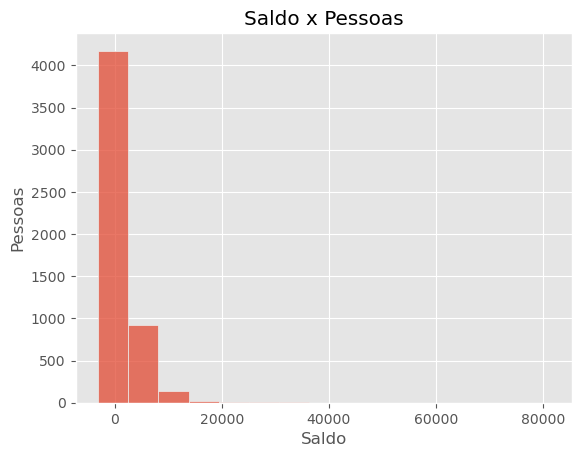

In [89]:
deposit_yes = df[df['deposit'] == 'yes']
sns.histplot(deposit_yes, x = 'balance', bins = 15);
plt.xlabel('Saldo');
plt.ylabel('Pessoas');
plt.title('Saldo x Pessoas');

Podemos ver que a média de saldo bancária para a aceitação de depósitos é de $1804, a maior parte do gráfico esta concentrado entre o 0, sendo o saldo bancário negativo ou positivo.

**Analises dos meses com maior aceitação dos depósitos**

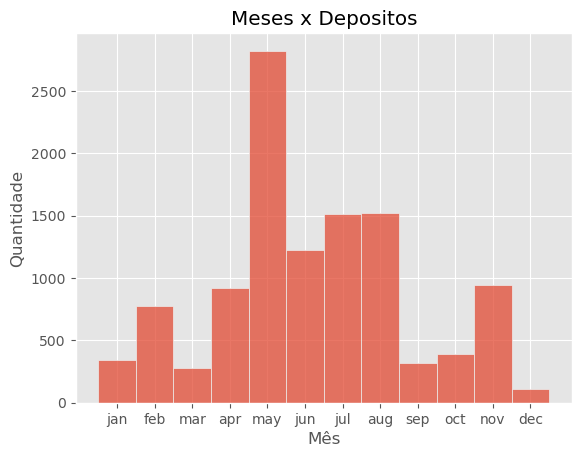

In [93]:
#REINDEX DOS MESES PORQUE ESTAVAM FORA DE ORDEM
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
sns.histplot(data = df, x = 'month', bins = 45);
plt.xlabel('Mês');
plt.ylabel('Quantidade');
plt.title('Meses x Depositos');

Podemos ver que os meses de Maio, Julho e Junho tiveram uma maior aceitação dos depósitos.

**Analise do histórico da campanha anterior com a atual**

In [97]:
deposit_yes['poutcome'].value_counts()

poutcome
unknown    3386
success     978
failure     618
other       307
Name: count, dtype: int64

In [99]:
deposit_no['poutcome'].value_counts()

poutcome
unknown    4940
failure     610
other       230
success      93
Name: count, dtype: int64

In [101]:
df[(df['poutcome'] == 'unknown') & (df['pdays'] == -1)].shape[0]

8324

O primeiro ponto a ser destacado é a presença de muitos valores desconhecidos (unknown) na coluna poutcome, o que compromete a análise comparativa entre campanhas. Esses valores representam, na maioria dos casos, clientes que não foram contatados anteriormente. Apenas 2 desses casos são decorrentes de falhas na coleta ou registro dos dados. Isso ressalta a necessidade de melhorar o rastreamento de informações em campanhas futuras.
Na comparação entre as campanhas, observamos que a taxa de aceitação da campanha atual foi 47%, enquanto a rejeição ficou em 53%. Já na campanha anterior, a aceitação foi de apenas 37%, com rejeição de 42%. Esses números indicam que a campanha atual foi mais eficiente, possivelmente devido à abordagem mais focada, já que o número total de pessoas abordadas foi menor.
Outro ponto importante é que a taxa de sucesso em atrair clientes que já aceitaram anteriormente foi significativamente maior do que a taxa de reconversão de clientes que rejeitaram no passado. Isso sugere que oferecer benefícios específicos para um segundo depósito pode ser uma estratégia eficaz para manter a adesão de clientes recorrentes.
Por fim, para os clientes que rejeitaram ambas as campanhas, é necessário explorar outras formas de engajamento. Sugerimos a criação de campanhas de marketing informativas, com foco em educar e atrair esses clientes, mostrando as vantagens dos produtos oferecidos. Além disso, a recompensa à equipe de vendas, pelos esforços em trazer clientes recorrentes, pode funcionar como uma motivação adicional para melhorar os resultados em campanhas futuras.

**Analise da relação do contact e aceitação dos depósitos**

In [105]:
deposit_yes['contact'].value_counts()

contact
cellular     4369
unknown       530
telephone     390
Name: count, dtype: int64

In [107]:
deposit_no['contact'].value_counts()

contact
cellular     3673
unknown      1816
telephone     384
Name: count, dtype: int64

A análise revela uma presença massiva de dados desconhecidos (unknown), especialmente em depósitos não aceitos, o que compromete a capacidade de entender quais métodos de contato foram usados e suas respectivas taxas de sucesso. É essencial melhorar a coleta e o armazenamento desses dados para direcionar ações futuras de forma mais eficiente. Se fosse possível identificar a origem desses dados, estratégias mais direcionadas poderiam ser aplicadas, aumentando as taxas de sucesso.
Entre os canais de contato, o celular se destaca como o mais eficiente, com uma taxa de aceitação de 39% e rejeição de 32%. Já o telefone fixo, menos utilizado atualmente, mostra-se menos eficaz. Para melhorar os resultados, sugere-se registrar números de celular e e-mails, além de diversificar os canais de comunicação, incluindo campanhas de marketing digital em redes sociais. Aproveitar o potencial do contato via celular, já com bons resultados, também é uma oportunidade a ser explorada, especialmente com abordagens personalizadas e o uso de tecnologias modernas. 

**Analise da aceitação dos clientes com ou sem crédito habitacional**

In [123]:
deposit_yes['housing'].value_counts()

housing
no     3354
yes    1935
Name: count, dtype: int64

In [125]:
deposit_no['housing'].value_counts()

housing
yes    3346
no     2527
Name: count, dtype: int64

Percebemos que clientes que realizaram os depositos não possuem créditos habitacionais, o que indica uma flexibilidade financeira maior, pois não tem o comprometimento do imovel financiado. Por outro lado, os clientes que não aceitaram o depósito possuem o crédito ou empréstimo habitacional, o que pode impactar na aceitação do deposito pois parte da sua renda já está voltada ao comprometimento do crédito. Uma solução que já foi citada e pode ser utilizada nessa ocasião seria os pacotes de beneficios combinados, onde o banco ofereceria um desconto das parcelas do crédito se a pessoa realizasse o depósito. Essa abordagem não apenas incentivaria a adesão aos depósitos, mas também proporcionaria um alívio financeiro para os clientes, aumentando a percepção de valor do produto oferecido pelo banco.

**CONCLUSÃO**

Com base nas análises realizadas, é possível concluir que o desempenho da campanha de depósitos bancários está diretamente relacionado a diversos fatores demográficos, financeiros e comportamentais dos clientes. A presença de dados desconhecidos, representados pelo valor "unknown" em variáveis como **poutcome** e **contact**, compromete parcialmente a profundidade da análise, uma vez que impede a avaliação precisa de certos comportamentos e resultados. É essencial que o banco melhore seus processos de coleta e armazenamento de dados, garantindo maior transparência e rastreabilidade para otimizar as campanhas futuras.

A análise revelou que clientes mais jovens, com menos de 23 anos, possuem uma taxa de aceitação significativamente baixa, representando apen s 3% do total de depósitos. Essa baixa adesão pode estar relacionada à falta de educação financeira e experiência com produtos bancários. Por outro lado, clientes com mais de 60 anos, que representam 13% dos depósitos, demonstram uma maior aceitação devido à dependência de contas para aposentadorias e rendimentos. Estratégias como a criação de contas específicas para jovens, com tarifas reduzidas e programas de educação financeira, e a adaptação de serviços para idosos, com suporte personalizado e aplicativos simplificados, podem melhorar a experiência desses grupos e aumentar a adesã.

A escolaridade também se mostrou um fator relevante, com clientes de nível superior representando 39% dos depósitos, enquanto aqueles com escolaridade básica correspondem a apenas 11%. Isso reforça a necessidade de iniciativas voltadas à educação financeira, especialmente para clientes de menor escolaridade, a fim de capacitá-los a tomar decisões mais informadas sobre produtos financeiros. Além disso, a análise apontou que clientes com empréstimos ou créditos habitacionais tendem a apresentar baixa adesão aos depósitos, com apenas 10% deles aceitando a oferta. Uma solução viável seria a introdução de pacotes de benefícios combinados, oferecendo descontos em parcelas de empréstimos para clientes que realizarem depósitos, incentivando a adesão e aliviando o comprometimento financero.

Outro fator importante identificado foi a duração das chamadas, onde conversas mais longas, entre três e cinco minutos, resultaram em uma maior taxa de aceitação, enquanto chamadas mais curtas, de um a dois minutos, tiveram taxas de rejeição mais altas. Isso indica a necessidade de treinamentos mais aprofundados para a equipe de vendas, a fim de melhorar a abordagem e maximizar o engajamento durante as ligações. Além disso, o celular se destacou como o canal mais eficiente, com 39% de aceitação, reforçando a importância de investir em registros atualizados de contato, como números de celular e e-mails, e expandir para campanhas digitais em redes soiais.

Por fim, a comparação entre a campanha atual e as anteriores mostrou que a abordagem focada desta campanha resultou em uma taxa de aceitação de 47%, superior aos 37% da campanha anterior. Isso indica que estratégias direcionadas, como a oferta de benefícios específicos para clientes recorrentes e a exploração de novos canais de comunicação, podem ser altamente eficazes. No entanto, é fundamental que o banco também se concentre em engajar clientes que rejeitaram ambas as campanhas, utilizando campanhas informativas e personalizadas para destacar os benefícios dos produtos ofeecidos.

Em resumo, com base nas análises realizadas e nos insights obtidos, recomenda-se ao banco priorizar melhorias na coleta e uso de dados, investir em educação financeira, diversificar os canais de comunicação e personalizar as estratégias para diferentes perfis de clientes. Essas ações podem não apenas aumentar a taxa de aceitação de depósitos, mas também fortalecer a relação entre o banco e seus clientes, garantindo um crescimento sustentável e alinhado às suas necessidades.
